# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.001
0.001
0.001
0.0
0.0
0.0
0.003
-0.001
-0.002
-0.002
0.0
0.001
0.001
0.0
0.002
0.99
0.995
0.995
0.993
0.992
1.991
1.994
1.995
1.994
1.994
2.991
2.995
2.995
2.994
2.995
3.988
3.991
3.992
3.992
3.991
4.996
5.0
5.001
5.0
5.0
5.999
6.002
6.003
6.001
6.001
6.949
6.953
6.954
6.953
6.954
7.901
7.905
7.905
7.904
7.903
8.903
8.907
8.906
8.905
8.906
9.902
9.904
9.907
9.905
9.905
10.903
10.907
10.907
10.907
10.906
11.903
11.904
11.907
11.906
11.906
12.904
12.906
12.908
12.906
12.906
13.903
13.907
13.907
13.906
13.906
14.589
14.593
14.594
14.593
14.594
15.278
15.282
15.282
15.281
15.281
16.28
16.284
16.285
16.284
16.285
17.281
17.285
17.286
17.285
17.285
17.285
18.288
18.288
18.287
18.288
19.29
19.29
19.289
19.288
20.286
20.29
20.29
20.289
20.29
21.201
21.205
21.205
21.205
21.206
22.12
22.12
22.118
22.118
23.122
23.122
23.12
23.119
24.137
24.137
24.135
24.135
25.133
25.133
25.132
25.132
26.133
26.133
26.131
26.131
27.133
27.133
27.131


57.411
57.411
57.41
57.636
57.65
57.65
57.651
57.651
57.651
57.682
57.682
57.682
57.682
57.682
57.682
57.682
57.681
57.684
57.683
57.683
57.683
57.682
57.682
57.682
57.682
57.681
57.681
57.681
57.681
57.681
57.68
57.68
57.679
57.679
57.679
57.679
57.679
57.679
57.679
57.679
57.679
57.679
57.679
57.68
57.68
57.68
57.679
57.678
57.678
57.678
57.677
57.677
57.816
57.816
57.817
57.817
57.817
57.817
57.817
57.817
57.818
57.818
57.818
57.816
57.816
57.816
57.816
57.815
57.815
57.815
57.815
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.814
57.813
57.813
57.814
57.814
57.814
57.812
57.812
57.812
57.812
57.811
57.811
57.982
57.986
57.993
57.995
57.995
57.995
58.009
58.009
58.009
58.009
58.009
58.008
58.008
58.01
58.01
58.01
58.009
58.009
58.009
58.007
58.007
58.006
58.009
58.009
58.009
58.008
58.008
58.009
58.187
58.197
58.196
58.195
58.194
58.196
58.195
58.193
58.197
58.198
58.592
58.591
58.591
58.591
58.593
58.593
58.592
58.592
58.592
59.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1392,2784,60.135
1393,2786,60.134
1394,2788,60.133
1395,2790,60.132


<IPython.core.display.Javascript object>


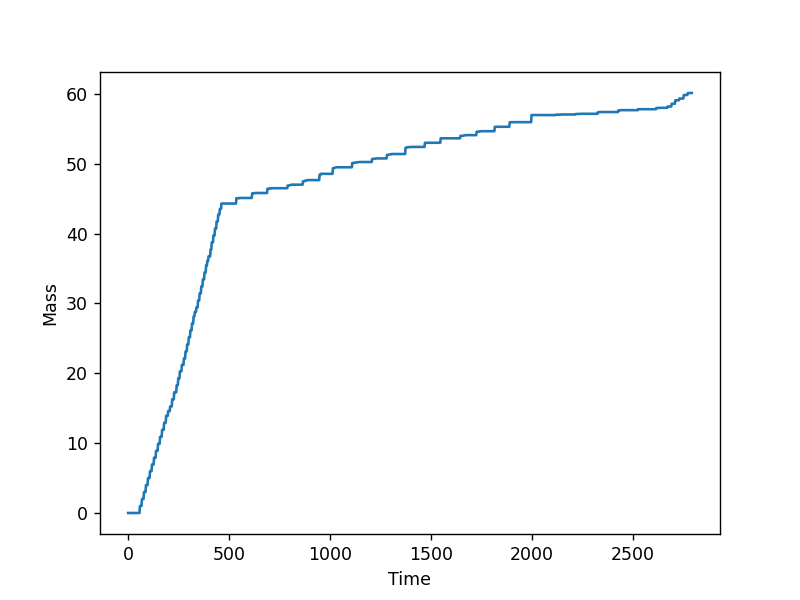

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_170723_S649-654.csv')